# word embeddings for IMDB data

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [26]:
#load data
from keras.datasets import imdb

max_length = 20

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=1000)

In [27]:
from keras.preprocessing.sequence import pad_sequences

In [28]:
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

In [29]:
X_train.shape

(25000, 20)

In [30]:
X_test.shape

(25000, 20)

In [31]:
y_train.shape

(25000,)

In [32]:
y_test.shape

(25000,)

## model

In [33]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [34]:
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=64, embeddings_initializer='uniform', input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 20, 64)            64000     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1281      
Total params: 65,281
Trainable params: 65,281
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='adam',
             metrics=['accuracy'],
             loss='binary_crossentropy')

In [53]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 71us/step - loss: 0.0308 - acc: 0.9978 - val_loss: 0.3774 - val_acc: 0.8992
Epoch 2/10
20000/20000 [==============================] - 1s 68us/step - loss: 0.0252 - acc: 0.9985 - val_loss: 0.4079 - val_acc: 0.8926
Epoch 3/10
20000/20000 [==============================] - 1s 71us/step - loss: 0.0209 - acc: 0.9995 - val_loss: 0.4525 - val_acc: 0.8818
Epoch 4/10
20000/20000 [==============================] - 1s 69us/step - loss: 0.0170 - acc: 0.9997 - val_loss: 0.4884 - val_acc: 0.8748
Epoch 5/10
20000/20000 [==============================] - 1s 73us/step - loss: 0.0152 - acc: 0.9996 - val_loss: 0.5340 - val_acc: 0.8638
Epoch 6/10
20000/20000 [==============================] - 1s 69us/step - loss: 0.0124 - acc: 0.9997 - val_loss: 0.5896 - val_acc: 0.8536
Epoch 7/10
20000/20000 [==============================] - 1s 69us/step - loss: 0.0107 - acc: 0.9999 - val_loss: 0.6402 - val_acc:

## Plot

In [54]:
import matplotlib.pyplot as plt

In [55]:
history.history.keys()

dict_keys(['val_loss', 'acc', 'val_acc', 'loss'])

In [56]:
train_acc = history.history['acc']
train_loss = history.history['loss']

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

num_of_data_points = len(train_acc)

In [57]:
len(train_acc)

10

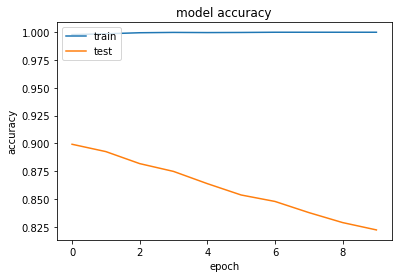

In [58]:
#plt.plot(num_of_data_points, train_acc)
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

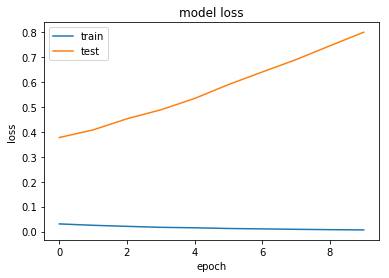

In [59]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()